# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&appid=" + weather_api_key + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | wailua homesteads
Processing Record 8 of Set 1 | margaret river
Processing Record 9 of Set 1 | afaahiti
Processing Record 10 of Set 1 | say
Processing Record 11 of Set 1 | pimentel
Processing Record 12 of Set 1 | papatowai
Processing Record 13 of Set 1 | west island
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | kijang
Processing Record 16 of Set 1 | arkhangel'sk
Processing Record 17 of Set 1 | hawaiian paradise park
Processing Record 18 of Set 1 | iyidere
Processing Record 19 of Set 1 | portage la prairie
Processing Record 20 of Set 1 | tambacounda
Processing Record 21 of Set 1 | p

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,11.01,76,96,0.45,NZ,1701792563
1,adamstown,-25.0660,-130.1015,22.40,82,100,6.19,PN,1701792563
2,thompson,55.7435,-97.8558,-12.29,94,66,2.36,CA,1701792563
3,hithadhoo,-0.6000,73.0833,28.23,73,41,2.87,MV,1701792563
4,edinburgh of the seven seas,-37.0676,-12.3116,15.34,95,100,5.09,SH,1701792564


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,11.01,76,96,0.45,NZ,1701792563
1,adamstown,-25.0660,-130.1015,22.40,82,100,6.19,PN,1701792563
2,thompson,55.7435,-97.8558,-12.29,94,66,2.36,CA,1701792563
3,hithadhoo,-0.6000,73.0833,28.23,73,41,2.87,MV,1701792563
4,edinburgh of the seven seas,-37.0676,-12.3116,15.34,95,100,5.09,SH,1701792564


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

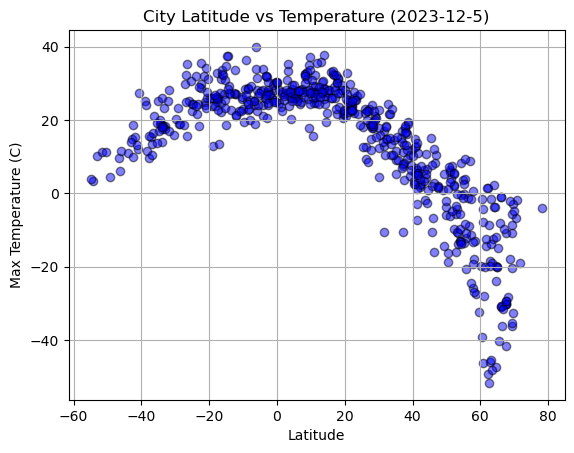

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], facecolor = "blue",alpha=.5, edgecolors="black" )

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs Temperature (2023-12-5)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

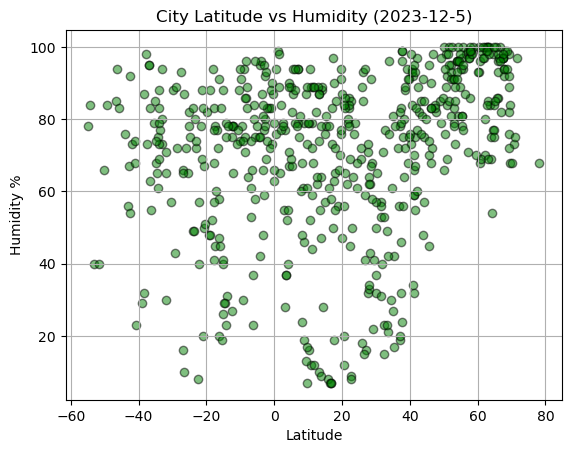

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], facecolor = "green",alpha=.5, edgecolors="black" )

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("City Latitude vs Humidity (2023-12-5)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

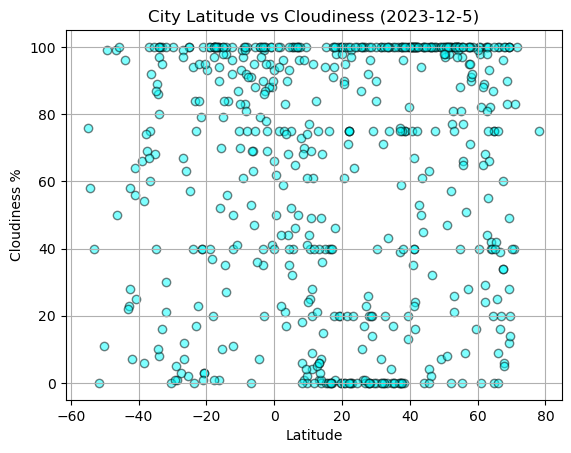

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], facecolor = "cyan",alpha=.5, edgecolors="black" )

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("City Latitude vs Cloudiness (2023-12-5)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

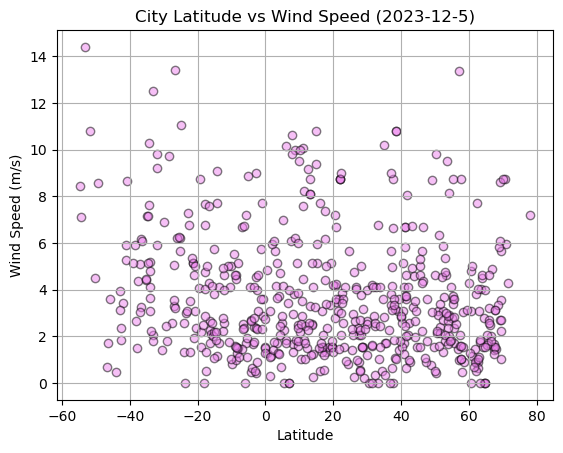

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], facecolor = "violet",alpha=.5, edgecolors="black" )

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed (2023-12-5)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [59]:
# Define a function to create Linear Regression plots
def regression_function(x, y, name, variable, hemisphere):
    (slope, intercept, rvalue, pvalue, stderror) = linregress(x,y)
    regress_values = x * slope + intercept
    plt.plot(x, regress_values, color = 'red')
    plt.title(f'Latitude vs {variable} - {hemisphere}')
    plt.xlabel("Latitude")
    plt.ylabel(variable)
    plt.grid()
    line_equation = f'y = {(round(slope,2))}x + {(round(intercept,2))}'
    plt.annotate(line_equation, (x.min(),y.min()), fontsize=12, color = 'red')
    print(f'The r value is {rvalue}')
    print(f'Linear equation is: {line_equation}')

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,thompson,55.7435,-97.8558,-12.29,94,66,2.36,CA,1701792563
5,wailua homesteads,22.0669,-159.3780,23.44,86,75,8.75,US,1701792564
8,say,13.1007,2.3689,35.68,10,1,3.30,NE,1701792564
12,ribeira grande,38.5167,-28.7000,19.32,88,75,10.80,PT,1701792565
13,kijang,35.2442,129.2139,9.20,42,0,1.70,KR,1701792565


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <= 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,11.01,76,96,0.45,NZ,1701792563
1,adamstown,-25.0660,-130.1015,22.40,82,100,6.19,PN,1701792563
3,hithadhoo,-0.6000,73.0833,28.23,73,41,2.87,MV,1701792563
4,edinburgh of the seven seas,-37.0676,-12.3116,15.34,95,100,5.09,SH,1701792564
6,margaret river,-33.9500,115.0667,13.89,83,8,5.20,AU,1701792564


###  Temperature vs. Latitude Linear Regression Plot

The r value is -0.8797383584215389
Linear equation is: y = -0.83x + 38.44


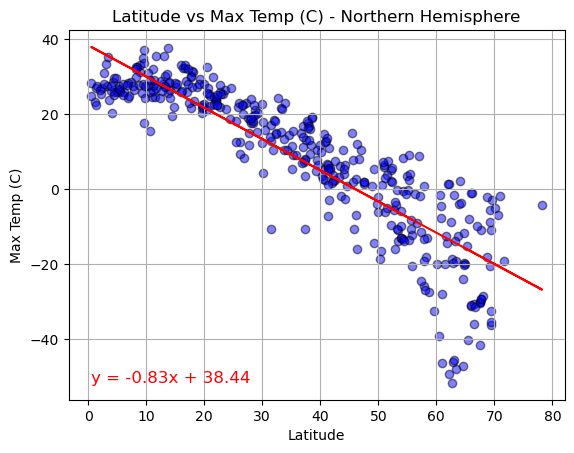

In [60]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], facecolors='blue', alpha=.5, edgecolors='black')
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
name = 'NorthernHemisphere_LatvMaxTemp'
variable = 'Max Temp (C)'
hemisphere = 'Northern Hemisphere'
regression_function(x,y,name,variable,hemisphere)
plt.show()

The r value is 0.6810947656636273
Linear equation is: y = 0.34x + 30.53


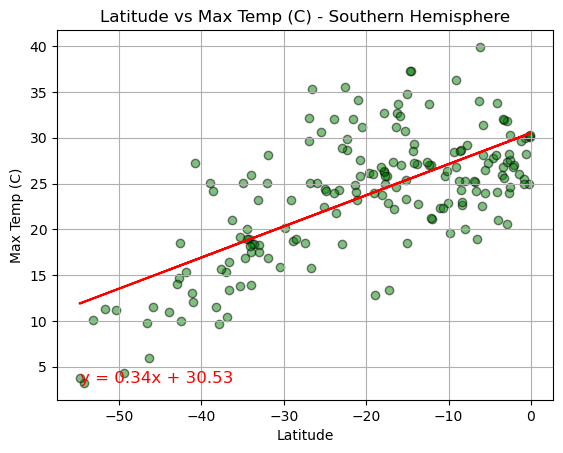

In [61]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], facecolors='green', alpha=.5, edgecolors='black')
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
name = 'SouthernHemisphere_LatvMaxTemp'
variable = 'Max Temp (C)'
hemisphere = 'Southern Hemisphere'
regression_function(x,y,name,variable,hemisphere)
plt.show()

**Discussion about the linear relationship:** As the latitude gets closer to 0 (approaching the equator) the temperature gets hotter. Our slope and y-intercept would change depending on the random cities we generate but I would infer this linear relationship holds true regardless.

### Humidity vs. Latitude Linear Regression Plot

The r value is 0.41337957887022714
Linear equation is: y = 0.48x + 55.45


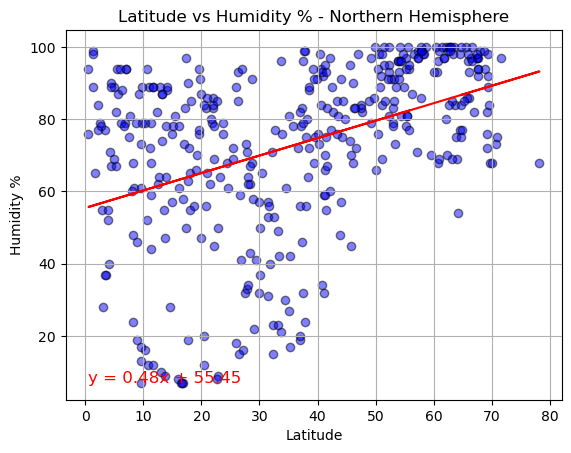

In [62]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], facecolors='blue', alpha=.5, edgecolors='black')
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
name = 'NorthernHemisphere_LatvHumidity'
variable = 'Humidity %'
hemisphere = 'Northern Hemisphere'
regression_function(x,y,name,variable,hemisphere)
plt.show()

The r value is 0.06751504351510436
Linear equation is: y = 0.1x + 70.47


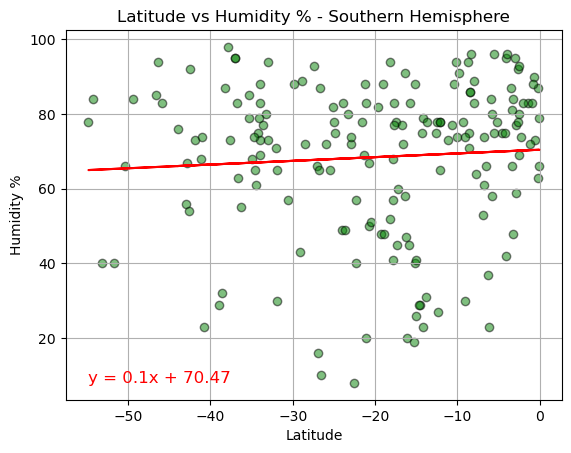

In [63]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], facecolors='green', alpha=.5, edgecolors='black')
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
name = 'SouthernHemisphere_LatvHumidity'
variable = 'Humidity %'
hemisphere = 'Southern Hemisphere'
regression_function(x,y,name,variable,hemisphere)
plt.show()

**Discussion about the linear relationship:** Based on our data here the conclusion is a lot less clear. For the Southern Hemisphere data there is really no difference to being closer to the equator when compared to humidity. This is shown by our slope reading of 0.1. For the Norther Hemisphere as you get closer to the equator the average humidity goes down. This is something I'd like to test further with a larger sample size before making a blanket comment.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is 0.17398533050270407
Linear equation is: y = 0.33x + 48.48


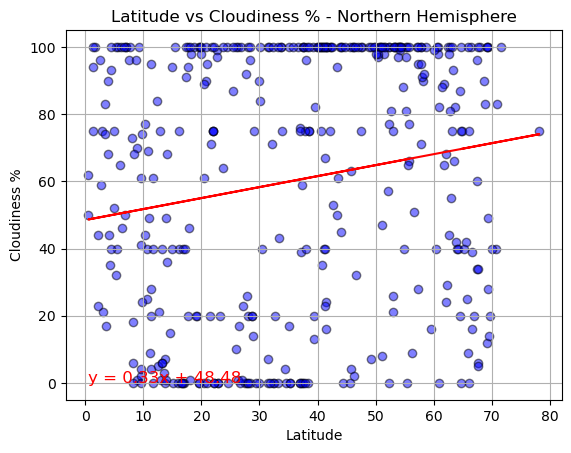

In [64]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], facecolors='blue', alpha=.5, edgecolors='black')
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
name = 'NorthernHemisphere_LatvCloudiness'
variable = 'Cloudiness %'
hemisphere = 'Northern Hemisphere'
regression_function(x,y,name,variable,hemisphere)
plt.show()

The r value is 0.2415423398190302
Linear equation is: y = 0.59x + 79.06


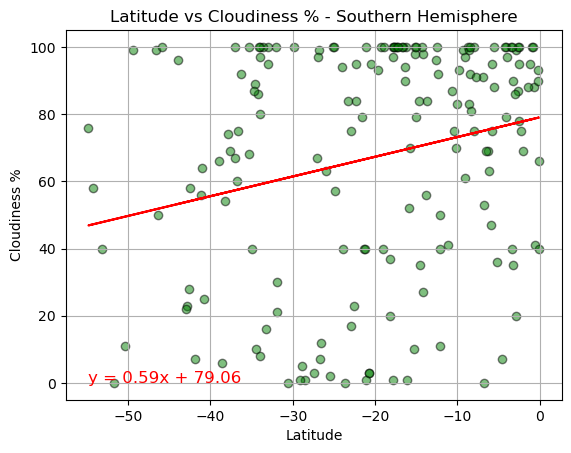

In [65]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], facecolors='green', alpha=.5, edgecolors='black')
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
name = 'SouthernHemisphere_LatvCloudiness'
variable = 'Cloudiness %'
hemisphere = 'Southern Hemisphere'
regression_function(x,y,name,variable,hemisphere)
plt.show()

**Discussion about the linear relationship:** For both hemispheres as you get closer to the equator the cloudiness goes down for our data set. Again this is not something that I can say definitively as cloudiness can change drasticly on a day-to-day basis.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is -0.07811258269128399
Linear equation is: y = -0.01x + 3.69


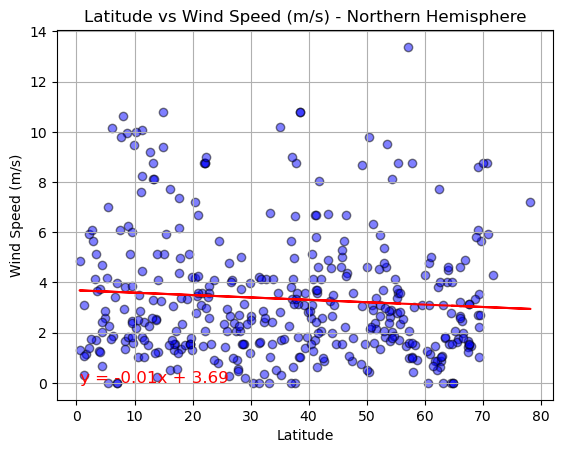

In [66]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], facecolors='blue', alpha=.5, edgecolors='black')
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
name = 'NorthernHemisphere_LatvWindSpeed'
variable = 'Wind Speed (m/s)'
hemisphere = 'Northern Hemisphere'
regression_function(x,y,name,variable,hemisphere)
plt.show()

The r value is -0.3405306994906781
Linear equation is: y = -0.07x + 2.69


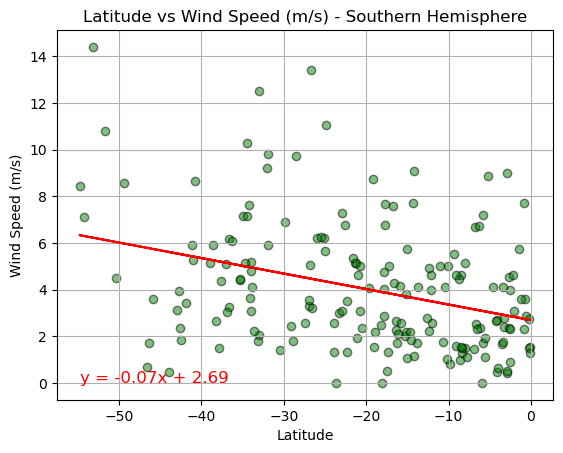

In [67]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], facecolors='green', alpha=.5, edgecolors='black')
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
name = 'SouthernHemisphere_LatvWindSpeed'
variable = 'Wind Speed (m/s)'
hemisphere = 'Southern Hemisphere'
regression_function(x,y,name,variable,hemisphere)
plt.show()

**Discussion about the linear relationship:** Our southern hemisphere data projects the idea that the closer you get to the equator the less wind speed. The Northern Hemisphere data does not really show any linear relationshop with our slope value being 0.01. This is something you'd have to test over multiple days or even weeks to see if there is a trend in wind speed compared to Latitude.